## ROCKING DATA TEST

### MAICO BERNAL 

### 1) PROGRAMATICO 

Se solicita programar una función en Python para bajar datos desde un S3. La función debe permitir que:
- Se pueda cambiar el repositorio de datos de forma flexible.
- Se pueda cambiar la ruta/nombre de los archivos de forma flexible.
- Se permita la descarga de archivos como csv. Atención: Revisar anexos al final del documento.

In [157]:
## For EDA
import pandas as pd
import numpy as np
import os
import glob
from io import StringIO
import json
from itertools import chain

## For plotting
import matplotlib.pyplot as plt
import plotly.express as px

## For Amazon
import boto3

## For missing data
import missingno as msno

#### WORDCLOUD
from wordcloud import WordCloud
#import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /Users/maico/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
list_s3_files = ['disney_plus_titles.csv', 'netflix_titles.csv']
path_in_s3 = ''

bucket_name = 'desafio-rkd'

list_names_to_save = ['disney.csv', 'netflix.csv']
path_in_local = 'data/'

with open('s3.json', 'r') as file:
    data = json.load(file)
    key = data['key']
    secret = data['secret']

In [9]:
class S3_downloader:
    def __init__(self, key, secret):
        self.s3 = boto3.client('s3', aws_access_key_id = key, aws_secret_access_key = secret)

    def save_file(self, bucket_name, object_key, file_name):
        self.s3.download_file(bucket_name, object_key, file_name)

    def get_file(self, bucket_name, object_key):
        obj = self.s3.get_object(Bucket = bucket_name, Key = object_key)
        return obj['Body'].read().decode('utf-8')

    def get_all_files(self, bucket_name, list_s3, path_in_s3 = '', path_in_local = '', list_names = []):
        for file in list_s3:
            file = path_in_s3 + file
            if len(list_names) == 0:
                file_local = path_in_local + file.split('/')[-1]
                self.save_file(bucket_name, file, file_local)
            else:
                file_local = path_in_local + list_names[list_s3.index(file)]
                self.save_file(bucket_name, file, file_local)
        
    def check_files(self, bucket_name):
        response = self.s3.list_objects_v2(Bucket = bucket_name)
        print(response['Contents'])
        return response['Contents']


In [11]:
downloader = S3_downloader(key, secret)

downloader.get_all_files(bucket_name, list_s3_files, path_in_s3, path_in_local, list_names_to_save)

### 2) QA
- Hacer análisis descriptivo y control de datos con Python.
- Explicar hallazgos y posibles problemas en un Jupyter Notebook o archivo con el código.
- Proponer posibles soluciones de forma escrita y/o profundizando en el video.

## DISNEY

In [18]:
disney = pd.read_csv('data/disney.csv', parse_dates=['date_added'], encoding='utf-8')
disney.index.name = 'id'
disney.head()

show_id     type                                             title  \
id                                                                      
0       s1    Movie  Duck the Halls: A Mickey Mouse Christmas Special   
1       s2    Movie                            Ernest Saves Christmas   
2       s3    Movie                      Ice Age: A Mammoth Christmas   
3       s4    Movie                        The Queen Family Singalong   
4       s5  TV Show                             The Beatles: Get Back   

                             director  \
id                                      
0   Alonso Ramirez Ramos, Dave Wasson   
1                         John Cherry   
2                        Karen Disher   
3                     Hamish Hamilton   
4                                 NaN   

                                                 cast        country  \
id                                                                     
0   Chris Diamantopoulos, Tony Anselmo, Tress MacN...            NaN   
1            Jim Varney, Noelle Parker, Douglas Seale            NaN   
2   Raymond Albert Romano, John Leguizamo, Denis L...  United States   
3   Darren Criss, Adam Lambert, Derek Hough, Alexa...            NaN   
4   John Lennon, Paul McCartney, George Harrison, ...            NaN   

   date_added  release_year rating  duration                      listed_in  \
id                                                                            
0  2021-11-26          2016   TV-G    23 min              Animation, Family   
1  2021-11-26          1988     PG    91 min                         Comedy   
2  2021-11-26          2011   TV-G    23 min      Animation, Comedy, Family   
3  2021-11-26          2021  TV-PG    41 min                        Musical   
4  2021-11-25          2021    NaN  1 Season  Docuseries, Historical, Music   

                                          description  
id                                                     
0    Join Mickey and the gang as they duck the halls!  
1   Santa Claus passes his magic bag to a new St. ...  
2           Sid the Sloth is on Santa's naughty list.  
3                This is real life, not just fantasy!  
4   A three-part documentary from Peter Jackson ca...

In [14]:
disney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [19]:
disney.describe(include=object)

show_id   type                                             title  \
count     1450   1450                                              1450   
unique    1450      2                                              1450   
top         s1  Movie  Duck the Halls: A Mickey Mouse Christmas Special   
freq         1   1052                                                 1   

           director            cast        country rating  duration  \
count           977            1260           1231   1447      1450   
unique          609            1193             89      9       158   
top     Jack Hannah  Winston Hibler  United States   TV-G  1 Season   
freq             17              10           1005    318       219   

                        listed_in  \
count                        1450   
unique                        329   
top     Animation, Comedy, Family   
freq                          124   

                                              description  
count                                                1450  
unique                                               1448  
top     Cooper and Cami Wrather co-host "Would You Wra...  
freq                                                    2

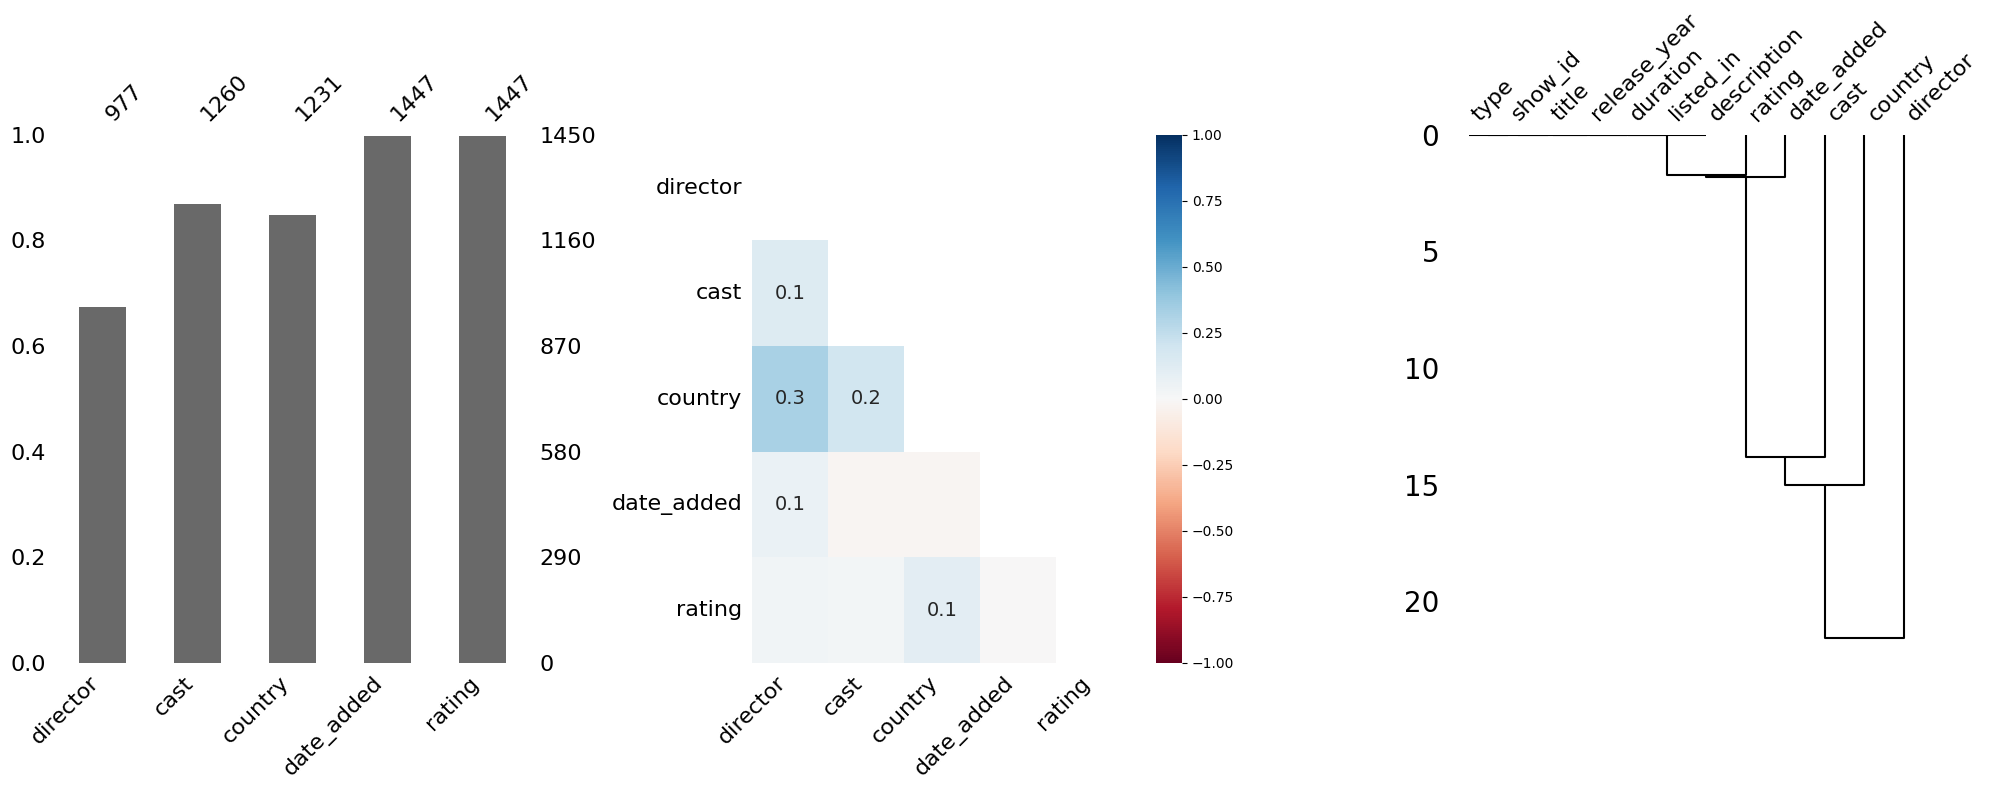

In [165]:
def plot_missing(df):
    fig, ax = plt.subplots(1,3,figsize=(20, 8))
    msno.bar(df.loc[:, df.isna().any()], ax=ax[0])
    msno.heatmap(df, ax=ax[1])
    msno.dendrogram(df, ax=ax[2])
    plt.tight_layout()
    plt.show()

plot_missing(disney)

In [26]:
disney.isna().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

<AxesSubplot: title={'center': 'Type of content'}>

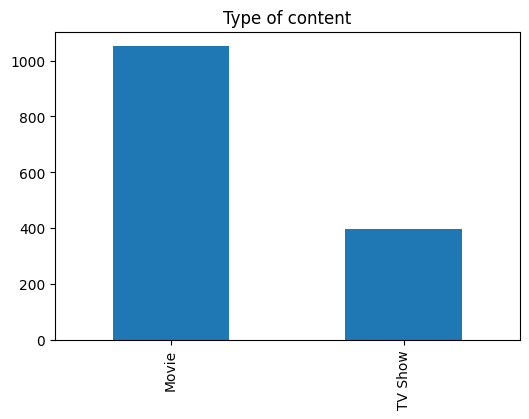

In [103]:
disney['type'].value_counts().plot(kind='bar', title='Type of content', figsize=(6, 4))

In [178]:
def countOccurrence(a):
    k = {}
    for j in a:
        if j in k:
            k[j] +=1
        else:
            k[j] =1
    return k

def show_most_wanted(df ,list_of_columns, split_with = ','):
    empty_list = []

    for column in list_of_columns:
        temp_list = list(chain(*df[column].fillna('', axis=0).map(lambda x: x.split(split_with)).tolist()))
        temp_list = [x for x in temp_list if len(x)>0]
        temp_list = [x.strip() for x in temp_list]
        dict_temp = countOccurrence(temp_list)
        empty_list.append(dict_temp)

    
    list_of_columns = list(chain(*list(zip([x.capitalize() for x in list_of_columns],[x.capitalize() + '_Count' for x in list_of_columns]))))

    list_of_df = []
    for i in range(len(empty_list)):
        df_temp = pd.DataFrame(empty_list[i], index = [i]).T.sort_values(by = i, ascending = False).head(20)
        df_temp = df_temp.reset_index()
        list_of_df.append(df_temp)
    
    df_final = pd.concat(list_of_df, axis=1)

    df_final.columns = list_of_columns
    
    return df_final

list_of_interest = ['director', 'cast', 'country', 'listed_in']
df2 = show_most_wanted(disney, list_of_interest)
df2

Director  Director_Count                 Cast  Cast_Count  \
0        Jack Hannah              17         Jim Cummings          33   
1      John Lasseter              16          Walt Disney          20   
2    Wilfred Jackson              16  Larry the Cable Guy          19   
3          Paul Hoen              16          Bill Farmer          18   
4   Robert Stevenson              13       Keith Ferguson          16   
5     Clyde Geronimi              13      Tress MacNeille          16   
6    Charles Nichols              12         Corey Burton          16   
7        Jack Kinney              12         Pinto Colvig          15   
8        James Algar              11         Bob Peterson          15   
9   Vincent McEveety              10         Jeff Bennett          15   
10      Bob Peterson              10            Tony Hale          14   
11      Kenny Ortega               9            Tim Allen          14   
12    Hamilton Luske               9        Wallace Shawn          13   
13    Stuart Gillard               8            Dee Baker          12   
14      Robert Vince               8         Russi Taylor          12   
15    Duwayne Dunham               8         Raven-Symoné          12   
16      Norman Tokar               8            Tom Hanks          11   
17       John Musker               7         Tony Anselmo          11   
18      Ron Clements               7      Anthony Daniels          11   
19    Ben Sharpsteen               7         Dove Cameron          11   

           Country  Country_Count         Listed_in  Listed_in_Count  
0    United States           1184            Family              632  
1   United Kingdom            101         Animation              542  
2           Canada             77            Comedy              526  
3        Australia             23  Action-Adventure              452  
4           France             22  Animals & Nature              208  
5      South Korea             13     Coming of Age              205  
6            China             10           Fantasy              192  
7            Japan             10       Documentary              174  
8          Germany              9              Kids              141  
9          Ireland              8             Drama              134  
10          Taiwan              6        Docuseries              122  
11           India              5   Science Fiction               91  
12           Spain              4        Historical               53  
13          Mexico              4             Music               48  
14       Hong Kong              4           Musical               44  
15     New Zealand              3            Sports               43  
16         Hungary              3      Biographical               41  
17       Argentina              3             Buddy               40  
18         Denmark              3         Anthology               28  
19    South Africa              3           Reality               26

In [94]:
print(disney['date_added'].min())
print(disney['date_added'].max())

2019-10-01 00:00:00
2021-11-26 00:00:00


<AxesSubplot: >

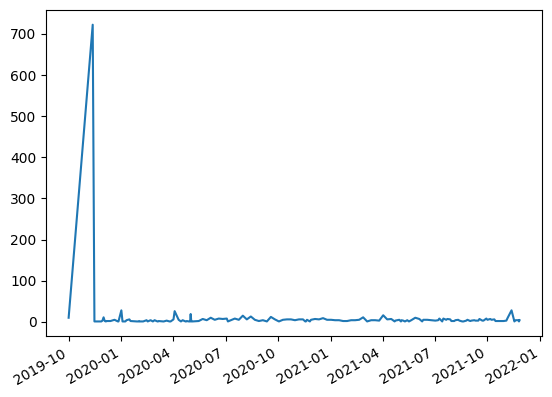

In [100]:
disney['date_added'].value_counts().plot()

<AxesSubplot: >

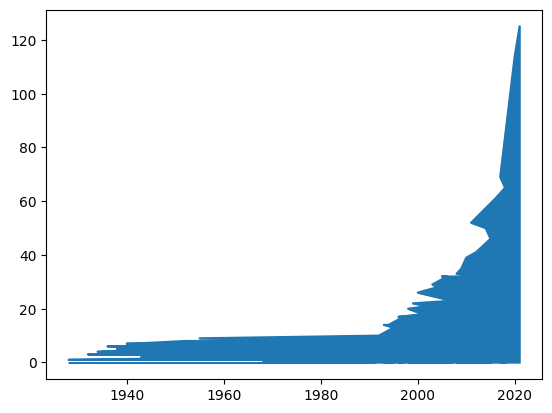

In [112]:
disney['release_year'].value_counts().plot(kind = 'area')

<AxesSubplot: >

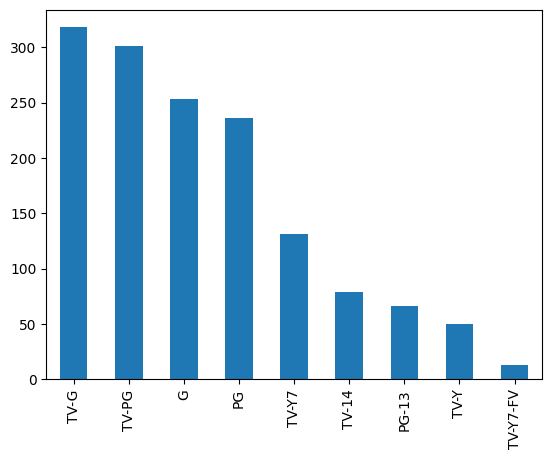

In [114]:
disney['rating'].value_counts().plot(kind = 'bar')

Number of movies with wrong duration time: 398
**************************************************


Statistics for duration time for movies properly filled:
count    1052.000000
mean       71.910646
std        40.595585
min         1.000000
25%        44.000000
50%        85.000000
75%        98.000000
max       183.000000
Name: duration, dtype: float64


<AxesSubplot: ylabel='Frequency'>

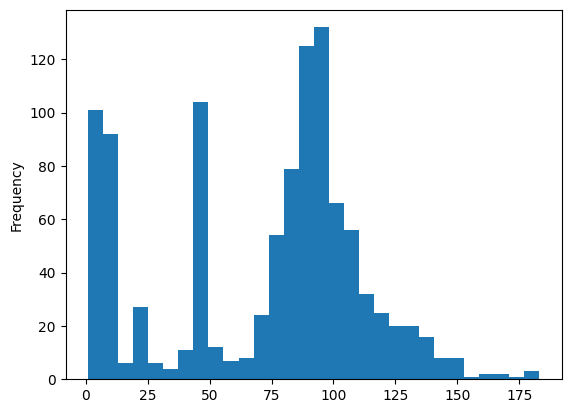

In [155]:
mask = disney['duration'].str.contains('min')
mask2 = disney['duration'].str.contains('eason')

print('Number of movies with wrong duration time: {}'.format(disney.loc[mask2].shape[0]))
print('*'*50)
print('\n\nStatistics for duration time for movies properly filled:')
print(disney.loc[mask, 'duration'].str.replace('min', '').astype(int).describe())

disney.loc[mask, 'duration'].str.replace('min', '').astype(int).plot(kind = 'hist', bins = 30)

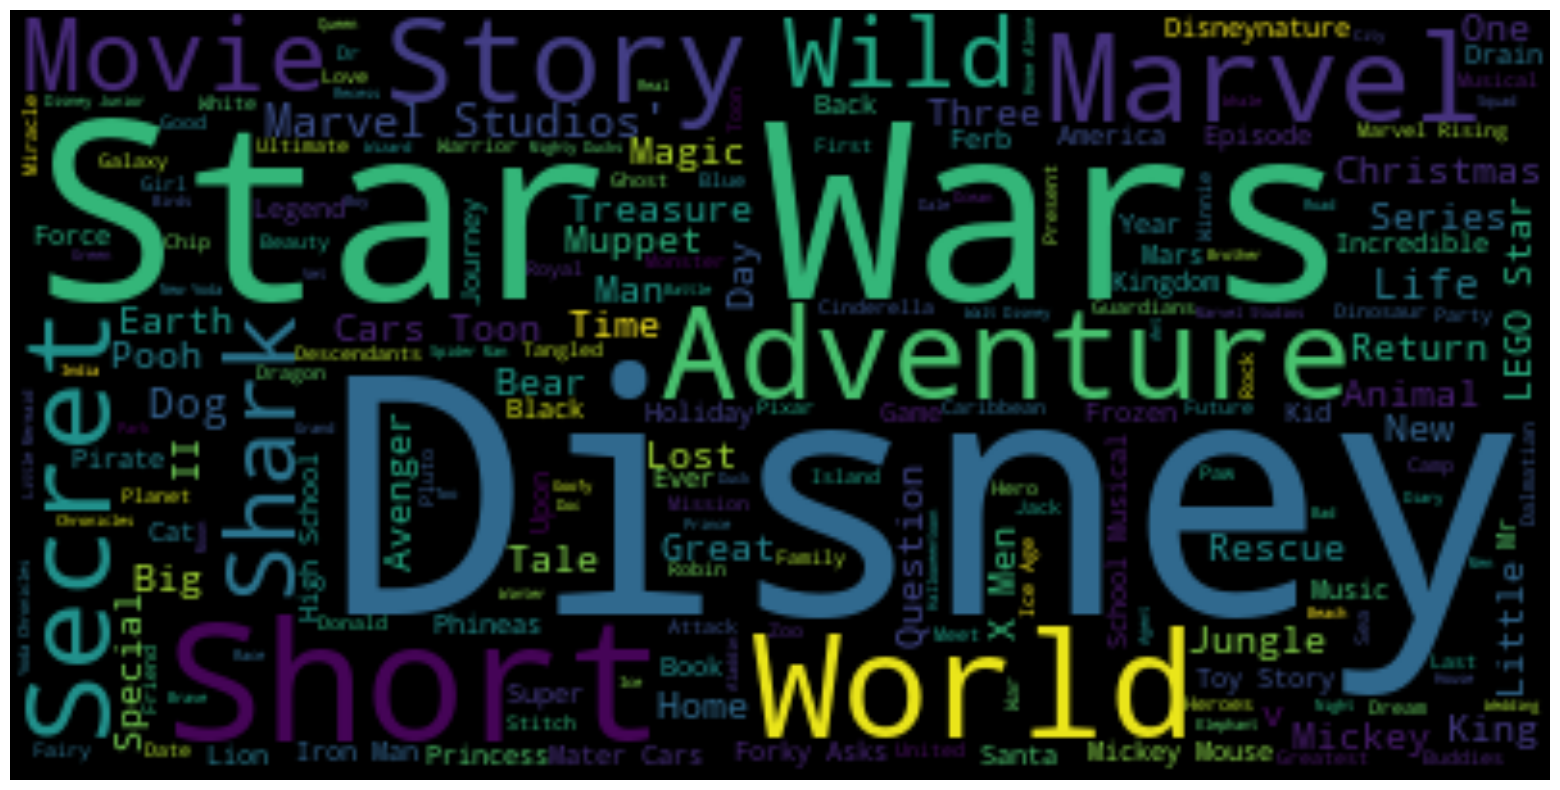

In [285]:
plain_text_title_d = ' '.join(disney['title'].fillna('', axis=0).tolist())
cloud_disney_t = WordCloud(stopwords = stopwords).generate(plain_text_title_d)
plt.figure(figsize=(20,10))
plt.imshow(cloud_disney_t, interpolation='bilinear')
plt.axis('off')
plt.show()

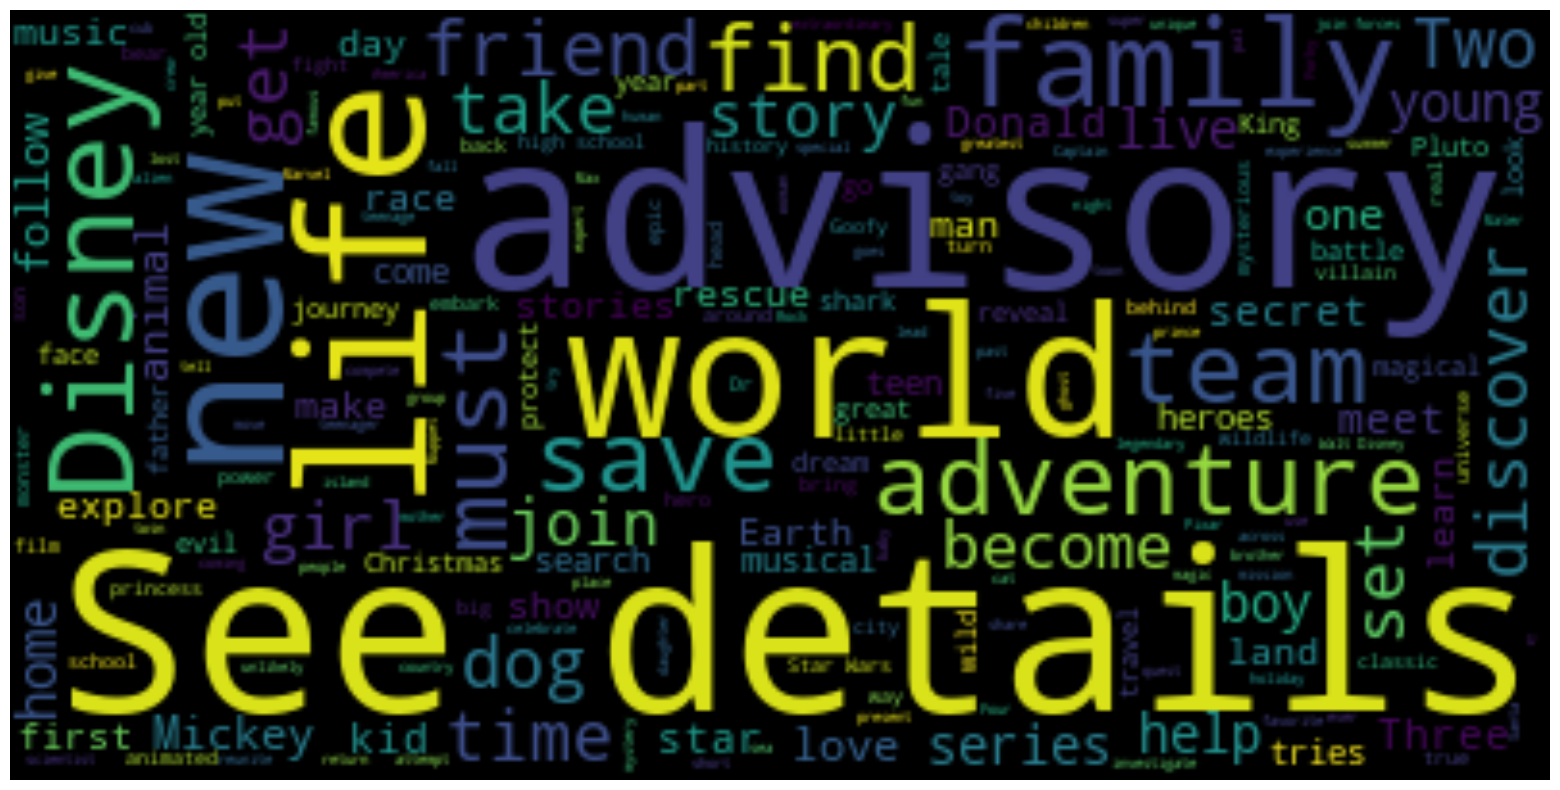

In [286]:
plain_text_description_d = ' '.join(disney['description'].fillna('', axis=0).tolist())
cloud_disney_d = WordCloud(stopwords = stopwords).generate(plain_text_description_d)
plt.figure(figsize=(20,10))
plt.imshow(cloud_disney_d, interpolation='bilinear')
plt.axis('off')
plt.show()

## NETFLIX

In [446]:
def correct_years(x):
    try: 
        return int(x)
    except:
        print(f'This value is wrong in column years: {x}. Erased and replaced with NaN')
        return np.nan

In [445]:
converters = {
            'show_id': lambda x: x if re.match('s', x) else np.nan,
            'type': lambda x: x if x in ['Movie', 'TV Show'] else np.nan,
            'title': lambda x: x if not re.search(r'\d{5,}',x) else np.nan,
            'director': lambda x: x if not re.search(r'\d',x) else np.nan,
            'cast': lambda x: x if not re.search(r'\d',x) else np.nan,
            'country': lambda x: x if not re.search(r'\d',x) else np.nan,
            'date_added': lambda x: pd.to_datetime(x, errors='coerce'), 
            'release_year': lambda x: correct_years(x),
            'rating': lambda x: x if x in ['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'PG', 'TV-Y7', 'TV-Y', 'TV-G', 'NR', 'G', 'UR'] else np.nan,
            'duration': lambda x: x if re.search(r'(?:min)|(?:eason)', x) else np.nan,
            'listed_in': lambda x: x if not re.search(r'\d',x) else np.nan,
            'description': lambda x: x
            }

In [447]:
netflix = pd.read_csv('data/netflix.csv', sep=';', encoding='utf-8',on_bad_lines='warn',  converters=converters, na_values=[''])
netflix.index.name = 'id'
netflix.dropna(thresh=netflix.shape[1]-5, axis=0, inplace=True)
netflix = netflix.replace(r'^\s*$', np.nan, regex=True)
netflix.head()

This value is wrong in column years: . Erased and replaced with NaN
This value is wrong in column years: . Erased and replaced with NaN
This value is wrong in column years: 40 min. Erased and replaced with NaN


show_id     type                  title         director  \
id                                                            
0       s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1       s2  TV Show          Blood & Water              NaN   
2       s3  TV Show              Ganglands  Julien Leclercq   
3       s4  TV Show  Jailbirds New Orleans              NaN   
4       s5  TV Show           Kota Factory              NaN   

                                                 cast        country  \
id                                                                     
0                                                 NaN  United States   
1   Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2   Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                 NaN            NaN   
4   Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

   date_added  release_year rating   duration  \
id                                              
0  2021-09-25        2020.0  PG-13     90 min   
1  2021-09-24        2021.0  TV-MA  2 Seasons   
2  2021-09-24        2021.0  TV-MA   1 Season   
3  2021-09-24        2021.0  TV-MA   1 Season   
4  2021-09-24        2021.0  TV-MA  2 Seasons   

                                            listed_in  \
id                                                      
0                                       Documentaries   
1     International TV Shows, TV Dramas, TV Mysteries   
2   Crime TV Shows, International TV Shows, TV Act...   
3                              Docuseries, Reality TV   
4   International TV Shows, Romantic TV Shows, TV ...   

                                          description  
id                                                     
0   As her father nears the end of his life, filmm...  
1   After crossing paths at a party, a Cape Town t...  
2   To protect his family from a powerful drug lor...  
3   Feuds, flirtations and toilet talk go down amo...  
4   In a city of coaching centers known to train I...

In [417]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8324 non-null   object        
 3   director      6171 non-null   object        
 4   cast          7964 non-null   object        
 5   country       7975 non-null   object        
 6   date_added    8796 non-null   datetime64[ns]
 7   release_year  8806 non-null   float64       
 8   rating        8790 non-null   object        
 9   duration      8803 non-null   object        
 10  listed_in     8806 non-null   object        
 11  description   8806 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 894.5+ KB


In [435]:
netflix['type'].str.contains('William').tolist().index(True)

8419

In [418]:
netflix.describe(include=object)

show_id   type                 title       director  \
count     8807   8807                  8324           6171   
unique    8807      2                  8324           4526   
top         s1  Movie  Dick Johnson Is Dead  Rajiv Chilaka   
freq         1   6131                     1             19   

                      cast        country rating  duration  \
count                 7964           7975   8790      8803   
unique                7674            748     12       220   
top     David Attenborough  United States  TV-MA  1 Season   
freq                    19           2817   3207      1793   

                           listed_in  \
count                           8806   
unique                           514   
top     Dramas, International Movies   
freq                             362   

                                              description  
count                                                8806  
unique                                               8774  
top     Paranormal activity at a lush, abandoned prope...  
freq                                                    4

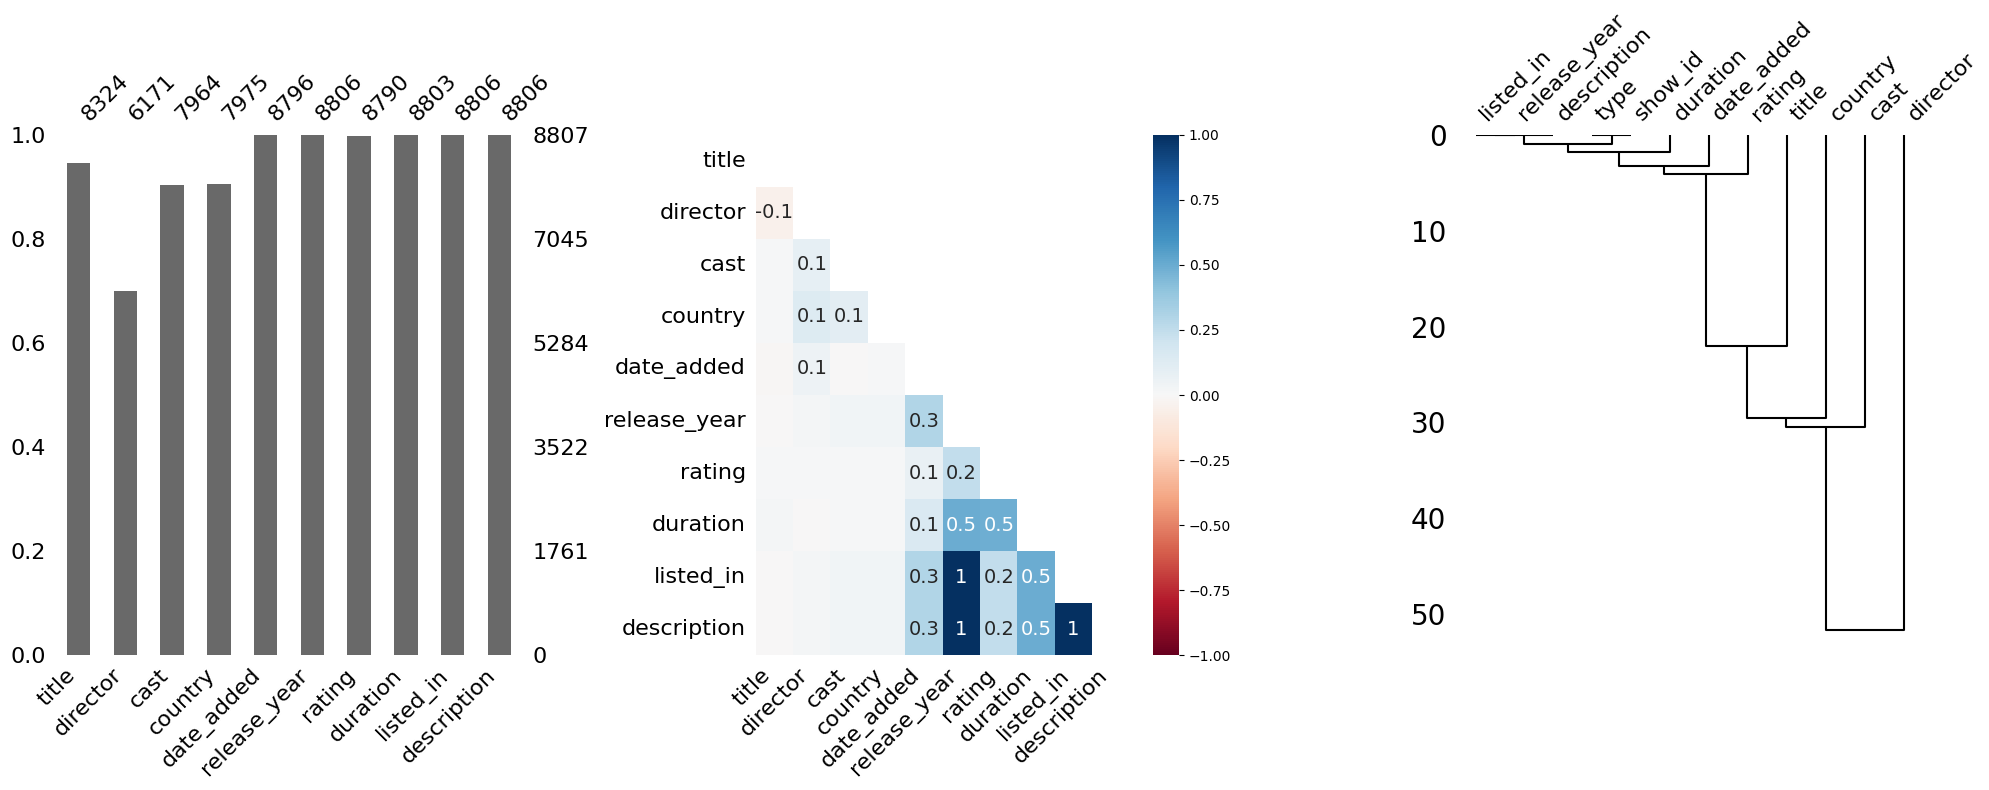

In [419]:
plot_missing(netflix)

In [449]:
netflix.isna().sum()

show_id            0
type               0
title              0
director        2636
cast             843
country          832
date_added        11
release_year       1
rating            17
duration           4
listed_in          1
description        1
dtype: int64

<AxesSubplot: title={'center': 'Type of content'}>

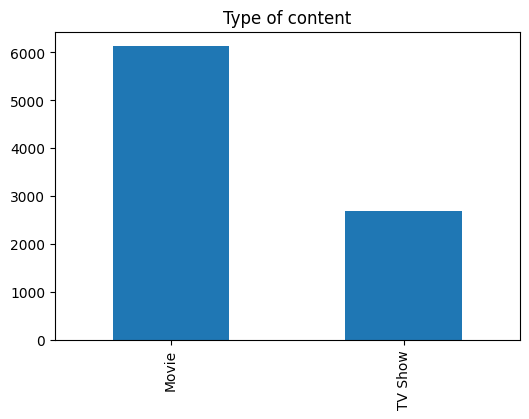

In [289]:
mask = netflix['type'].str.contains('William', na = False)

netflix.loc[-mask,'type'].value_counts().plot(kind='bar', title='Type of content', figsize=(6, 4))

In [293]:
netflix.iloc[mask.tolist().index(True)-3:mask.tolist().index(True)+3]

show_id           type                            title  \
id                                                                       
8418             s8418          Movie                  The Mayo Clinic   
8419             s8419          Movie                        The Mayor   
8420             s8420          Movie  The Memphis Belle: A Story of a   
8421  Flying Fortress"  William Wyler                              NaN   
8422             s8421          Movie       The Men Who Stare at Goats   
8423             s8422        TV Show                   The Messengers   

                                            director  \
id                                                     
8418  Ken Burns, Christopher Loren Ewers, Erik Ewers   
8419                                      Park In-je   
8420                                             NaN   
8421                                   United States   
8422                                    Grant Heslov   
8423                                             NaN   

                                                   cast  \
id                                                        
8418                                       Peter Coyote   
8419  Min-sik Choi, Do-won Kwak, Eun-kyung Shim, So-...   
8420                                                NaN   
8421                                     March 31, 2017   
8422  George Clooney, Ewan McGregor, Jeff Bridges, K...   
8423  Shantel VanSanten, Diogo Morgado, JD Pardo, Jo...   

                            country date_added release_year  \
id                                                            
8418                  United States 2019-04-19         2018   
8419                    South Korea 2017-09-30         2017   
8420                            NaN        NaT          NaN   
8421                           1944        NaT       40 min   
8422  United States, United Kingdom 2019-06-04         2009   
8423                  United States 2016-04-17         2015   

                             rating  \
id                                    
8418                          TV-14   
8419                          TV-MA   
8420                            NaN   
8421  Classic Movies, Documentaries   
8422                              R   
8423                          TV-14   

                                               duration  \
id                                                        
8418                                            116 min   
8419                                            130 min   
8420                                                NaN   
8421  This documentary centers on the crew of the B-...   
8422                                             94 min   
8423                                           1 Season   

                                         listed_in  \
id                                                   
8418                                 Documentaries   
8419                  Dramas, International Movies   
8420                                           NaN   
8421                                           NaN   
8422                                      Comedies   
8423  TV Dramas, TV Mysteries, TV Sci-Fi & Fantasy   

                                            description  
id                                                       
8418  A look at how a world-renowned medical institu...  
8419  With the presidency in mind, the incumbent may...  
8420                                                NaN  
8421                                                NaN  
8422  A journalist latches onto an unbelievable stor...  
8423  A group of strangers who are killed by a myste...

In [179]:
list_of_interest = ['director', 'cast', 'country', 'listed_in']
netflix_top = show_most_wanted(netflix, list_of_interest)
netflix_top

Director  Director_Count               Cast  Cast_Count  \
0         Rajiv Chilaka              22        Anupam Kher          43   
1             Jan Suter              21     Shah Rukh Khan          35   
2           Raúl Campos              19      Julie Tejwani          33   
3           Suhas Kadav              16   Naseeruddin Shah          32   
4          Marcus Raboy              16   Takahiro Sakurai          32   
5             Jay Karas              15       Rupa Bhimani          31   
6   Cathy Garcia-Molina              13       Akshay Kumar          30   
7       Youssef Chahine              12            Om Puri          30   
8       Martin Scorsese              12          Yuki Kaji          29   
9           Jay Chapman              12       Paresh Rawal          28   
10     Steven Spielberg              11   Amitabh Bachchan          28   
11     Don Michael Paul              10        Boman Irani          27   
12      Shannon Hartman               9        Rajesh Kava          26   
13         David Dhawan               9       Vincent Tong          26   
14       Anurag Kashyap               9     Kareena Kapoor          25   
15       Yılmaz Erdoğan               9      Andrea Libman          25   
16          Lance Bangs               8  Samuel L. Jackson          24   
17           Johnnie To               8        John Cleese          24   
18          Ryan Polito               8        Tara Strong          23   
19          Hakan Algül               8     Jigna Bhardwaj          23   

           Country  Country_Count                 Listed_in  Listed_in_Count  
0    United States           3689      International Movies             2752  
1            India           1046                    Dramas             2427  
2   United Kingdom            806                  Comedies             1674  
3           Canada            445    International TV Shows             1351  
4           France            393             Documentaries              868  
5            Japan            318        Action & Adventure              859  
6            Spain            232                 TV Dramas              763  
7      South Korea            231        Independent Movies              756  
8          Germany            226  Children & Family Movies              641  
9           Mexico            169           Romantic Movies              616  
10           China            162               TV Comedies              581  
11       Australia            160                 Thrillers              577  
12           Egypt            117            Crime TV Shows              470  
13          Turkey            113                  Kids' TV              451  
14       Hong Kong            105                Docuseries              395  
15         Nigeria            103          Music & Musicals              375  
16           Italy            100         Romantic TV Shows              370  
17          Brazil             97             Horror Movies              357  
18       Argentina             91           Stand-Up Comedy              343  
19         Belgium             90                Reality TV              255

In [210]:
print(netflix['date_added'].min())
print(netflix['date_added'].max())

2009-05-05 00:00:00
2021-05-31 00:00:00


<AxesSubplot: >

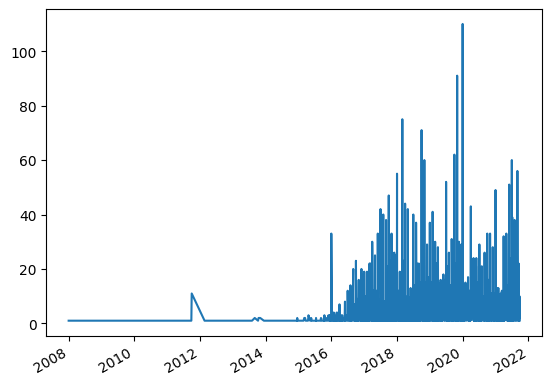

In [217]:
netflix['date_added'].value_counts().plot()

<AxesSubplot: >

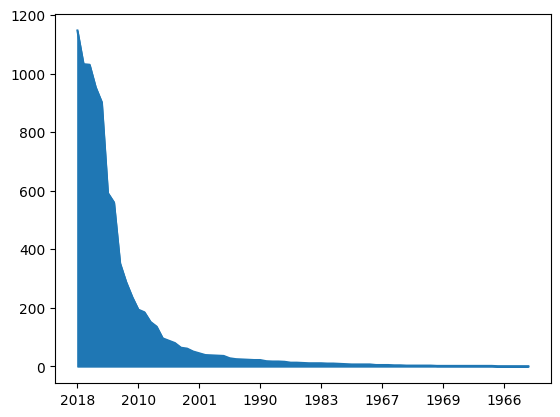

In [272]:
netflix['release_year'].value_counts().plot(kind = 'area')

<AxesSubplot: >

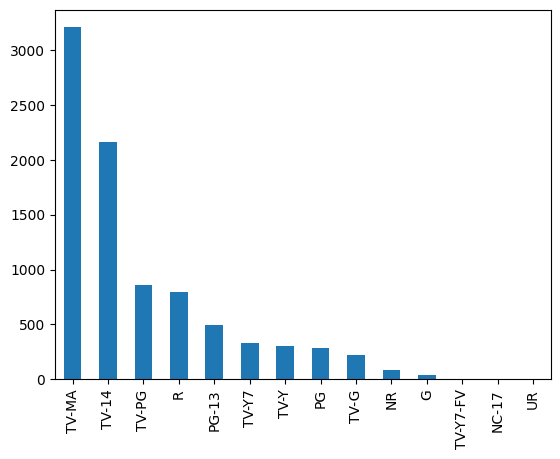

In [279]:
mask = netflix['rating'].str.contains('(?:min)|(?:Docu)', na=False)
netflix.loc[-mask,'rating'].value_counts().plot(kind = 'bar')


Number of movies with wrong duration time: 2676
**************************************************


Statistics for duration time for movies properly filled:
count    6127.000000
mean       99.586910
std        28.282659
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64


<AxesSubplot: ylabel='Frequency'>

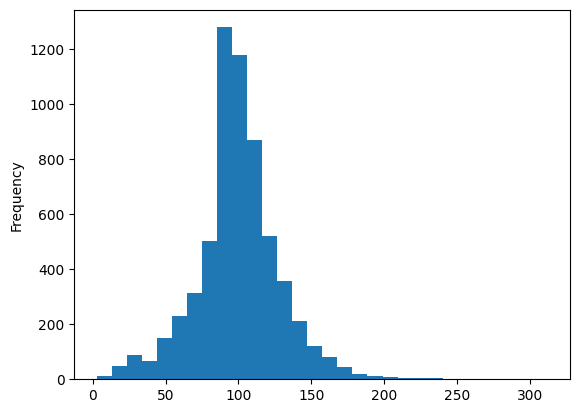

In [266]:
mask = netflix['duration'].str.contains('min', na=False)
mask2 = netflix['duration'].str.contains('eason', na=False)

print('Number of movies with wrong duration time: {}'.format(netflix.loc[mask2].shape[0]))
print('*'*50)
print('\n\nStatistics for duration time for movies properly filled:')
print(netflix.loc[mask, 'duration'].str.replace('min', '').astype(int).describe())

netflix.loc[mask, 'duration'].str.replace('min', '').astype(int).plot(kind = 'hist', bins = 30)

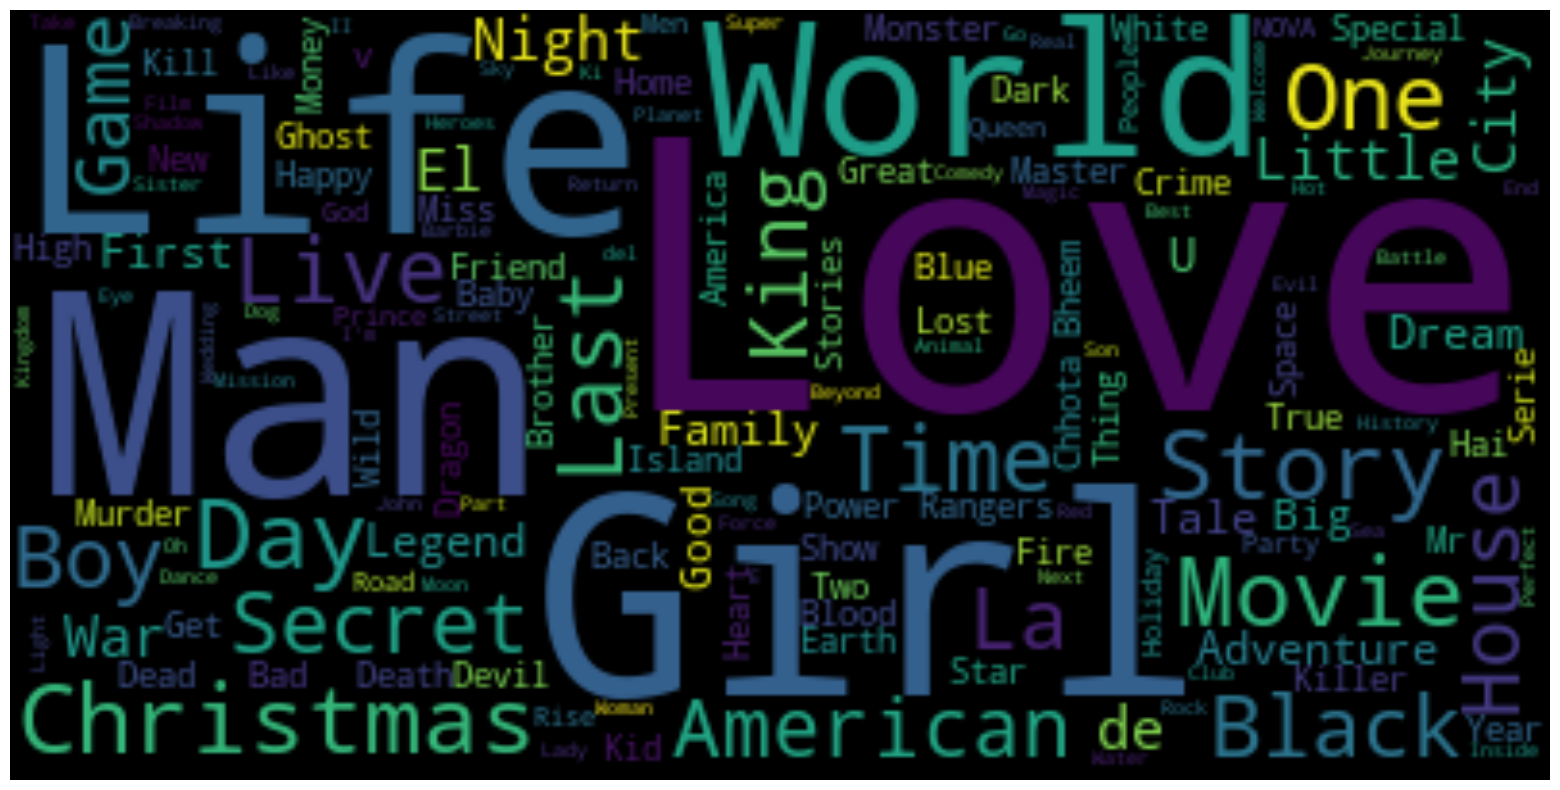

In [283]:
plain_text_title_n = ' '.join(netflix['title'].fillna('', axis=0).tolist())
cloud_title_n = WordCloud(stopwords = stopwords).generate(plain_text_title_n)
plt.figure(figsize=(20,10))
plt.imshow(cloud_title_n, interpolation='bilinear')
plt.axis('off')
plt.show()

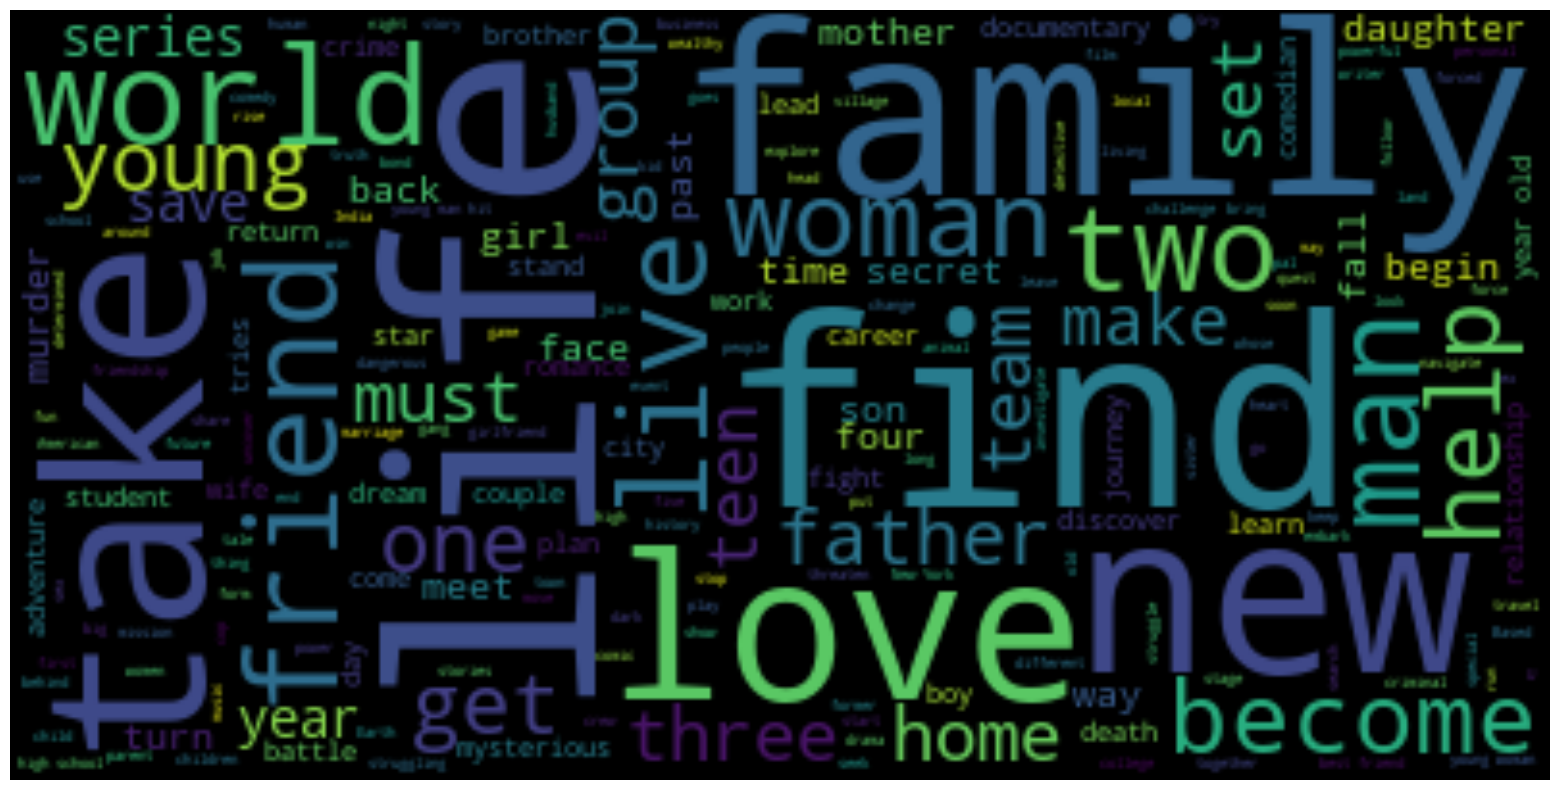

In [284]:
plain_text_description_n = ' '.join(netflix['description'].fillna('', axis=0).tolist())
cloud_description_n = WordCloud(stopwords = stopwords).generate(plain_text_description_n)
plt.figure(figsize=(20,10))
plt.imshow(cloud_description_n, interpolation='bilinear')
plt.axis('off')
plt.show()

### 3) Modelado de datos
- Partiendo de la salida generada en el punto anterior (QA) armar el modelo de datos.
- Generar el script DDL para la creación de cada una de las tablas representadas en el modelo datos.
- Subir los archivos a una base de datos a elección.
- Crear la cantidad de tablas e índices que consideres necesario.


## SINTETIC DATA AND AIRFLOW LIVE